In [4]:
from __future__ import print_function
import numpy as np
import pandas as pd

%pylab inline

import csv
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.colors as colors
import matplotlib.cm as cmx
#from scipy.integrate import simps
#from numpy import trapz#for j in range(1,2):
##in anaconda terminal "pip install mpld3"
%matplotlib inline
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


extract only data, omit experiment condition description,using bash

In [5]:
%%bash
head -76 'Lysozyme_Concentration_Curve_Trehalose_Melibiose_Lactulose_40min_A450_25C_030719_v003.csv' | tail -49 > temp5

In [6]:
%%bash
head -42 temp5 > temp2
cut  -d "," -f 3- temp2 > temp3

In [7]:
%%bash
tr -cd '[:print:][:cntrl:]'  < temp3 > test3.csv

In [8]:
raw_data=pd.read_csv("test3.csv", index_col=False )

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 97 columns):
Time                      41 non-null object
T 450                     41 non-null float64
Blank                     41 non-null float64
Blank.1                   41 non-null float64
Blank.2                   41 non-null float64
Neg Ctrl                  41 non-null float64
Neg Ctrl.1                41 non-null float64
Neg Ctrl.2                41 non-null float64
Pos Ctrl                  41 non-null float64
Pos Ctrl.1                41 non-null float64
Pos Ctrl.2                41 non-null float64
Trehalose ( 10mM)         41 non-null float64
Trehalose ( 10mM).1       41 non-null float64
Trehalose ( 10mM).2       41 non-null float64
Trehalose ( 1 mM)         41 non-null float64
Trehalose ( 1 mM).1       41 non-null float64
Trehalose ( 1 mM).2       41 non-null float64
Trehalose ( 1E-1 mM)      41 non-null float64
Trehalose ( 1E-1 mM).1    41 non-null float64
Trehalose ( 1E-1 mM).2  

In [10]:
raw_data.head()

,Time,T 450,Blank,Blank.1,Blank.2,Neg Ctrl,Neg Ctrl.1,Neg Ctrl.2,Pos Ctrl,Pos Ctrl.1,...,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96
0,0:00:00,25.7,0.043,0.041,0.047,0.551,0.566,0.567,0.470,0.498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0:01:00,25.7,0.043,0.041,0.047,0.557,0.572,0.574,0.408,0.434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0:02:00,25.7,0.043,0.041,0.047,0.553,0.578,0.568,0.390,0.401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0:03:00,25.7,0.044,0.041,0.047,0.567,0.577,0.572,0.360,0.355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0:04:00,25.7,0.043,0.041,0.047,0.573,0.579,0.575,0.338,0.325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#remove NAN
raw_data2=raw_data.dropna(axis=1)

In [12]:
raw_data2.describe()

,T 450,Blank,Blank.1,Blank.2,Neg Ctrl,Neg Ctrl.1,Neg Ctrl.2,Pos Ctrl,Pos Ctrl.1,Pos Ctrl.2,...,Lactulose (1E-3 mM).2,Lactulose (1E-4 mM),Lactulose (1E-4 mM).1,Lactulose (1E-4 mM).2,Lactulose (1E-5 mM),Lactulose (1E-5 mM).1,Lactulose (1E-5 mM).2,Lactulose (1E-6 mM),Lactulose (1E-6 mM).1,Lactulose (1E-6 mM).2
count,41.000000,41.000000,41.000000,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,25.697561,0.043293,0.041341,4.700000e-02,0.576317,0.578122,0.576927,0.173439,0.172927,0.189732,...,0.160537,0.170561,0.242098,0.188585,0.176024,0.168805,0.167585,0.162805,0.164415,0.162073
std,0.015617,0.000461,0.000480,2.810038e-17,0.007875,0.002977,0.003771,0.102362,0.106487,0.103011,...,0.106186,0.114732,0.154700,0.107267,0.111523,0.106961,0.108814,0.106189,0.107953,0.108903
min,25.600000,0.043000,0.041000,4.700000e-02,0.551000,0.566000,0.567000,0.088000,0.086000,0.103000,...,0.077000,0.080000,0.101000,0.100000,0.085000,0.082000,0.081000,0.079000,0.079000,0.075000
25%,25.700000,0.043000,0.041000,4.700000e-02,0.573000,0.577000,0.574000,0.100000,0.098000,0.116000,...,0.085000,0.088000,0.119000,0.110000,0.095000,0.090000,0.089000,0.086000,0.086000,0.084000
50%,25.700000,0.043000,0.041000,4.700000e-02,0.578000,0.579000,0.578000,0.125000,0.123000,0.142000,...,0.108000,0.115000,0.179000,0.136000,0.123000,0.117000,0.114000,0.110000,0.112000,0.110000
75%,25.700000,0.044000,0.042000,4.700000e-02,0.582000,0.580000,0.580000,0.215000,0.215000,0.232000,...,0.203000,0.220000,0.325000,0.238000,0.224000,0.215000,0.213000,0.207000,0.209000,0.206000
max,25.700000,0.044000,0.042000,4.700000e-02,0.585000,0.583000,0.582000,0.470000,0.498000,0.497000,...,0.478000,0.509000,0.679000,0.492000,0.508000,0.459000,0.475000,0.464000,0.475000,0.478000


In [13]:
raw_data2.head()

,Time,T 450,Blank,Blank.1,Blank.2,Neg Ctrl,Neg Ctrl.1,Neg Ctrl.2,Pos Ctrl,Pos Ctrl.1,...,Lactulose (1E-3 mM).2,Lactulose (1E-4 mM),Lactulose (1E-4 mM).1,Lactulose (1E-4 mM).2,Lactulose (1E-5 mM),Lactulose (1E-5 mM).1,Lactulose (1E-5 mM).2,Lactulose (1E-6 mM),Lactulose (1E-6 mM).1,Lactulose (1E-6 mM).2
0,0:00:00,25.7,0.043,0.041,0.047,0.551,0.566,0.567,0.470,0.498,...,0.478,0.509,0.679,0.492,0.508,0.459,0.475,0.464,0.475,0.478
1,0:01:00,25.7,0.043,0.041,0.047,0.557,0.572,0.574,0.408,0.434,...,0.413,0.465,0.602,0.453,0.442,0.436,0.434,0.421,0.430,0.437
2,0:02:00,25.7,0.043,0.041,0.047,0.553,0.578,0.568,0.390,0.401,...,0.380,0.408,0.551,0.400,0.402,0.392,0.394,0.385,0.390,0.381
3,0:03:00,25.7,0.044,0.041,0.047,0.567,0.577,0.572,0.360,0.355,...,0.355,0.370,0.498,0.384,0.376,0.367,0.367,0.354,0.358,0.357
4,0:04:00,25.7,0.043,0.041,0.047,0.573,0.579,0.575,0.338,0.325,...,0.324,0.339,0.469,0.351,0.344,0.336,0.338,0.331,0.331,0.330


In [14]:
colnames=list(raw_data2)

In [15]:
colnames

['Time',
 'T 450',
 'Blank',
 'Blank.1',
 'Blank.2',
 'Neg Ctrl',
 'Neg Ctrl.1',
 'Neg Ctrl.2',
 'Pos Ctrl',
 'Pos Ctrl.1',
 'Pos Ctrl.2',
 'Trehalose ( 10mM)',
 'Trehalose ( 10mM).1',
 'Trehalose ( 10mM).2',
 'Trehalose ( 1 mM)',
 'Trehalose ( 1 mM).1',
 'Trehalose ( 1 mM).2',
 'Trehalose ( 1E-1 mM)',
 'Trehalose ( 1E-1 mM).1',
 'Trehalose ( 1E-1 mM).2',
 'Trehalose ( 1E-2 mM)',
 'Trehalose ( 1E-2 mM).1',
 'Trehalose ( 1E-2 mM).2',
 'Trehalose ( 1E-3 mM)',
 'Trehalose ( 1E-3 mM).1',
 'Trehalose ( 1E-3 mM).2',
 'Trehalose ( 1E-4 mM)',
 'Trehalose ( 1E-4 mM).1',
 'Trehalose ( 1E-4 mM).2',
 'Trehalose ( 1E-5 mM)',
 'Trehalose ( 1E-5 mM).1',
 'Trehalose ( 1E-5 mM).2',
 'Trehalose ( 1E-6 mM)',
 'Trehalose ( 1E-6 mM).1',
 'Trehalose ( 1E-6 mM).2',
 'Melibiose (10 mM)',
 'Melibiose (10 mM).1',
 'Melibiose (10 mM).2',
 'Melibiose (1 mM)',
 'Melibiose (1 mM).1',
 'Melibiose (1 mM).2',
 'Melibiose (1E-1 mM)',
 'Melibiose (1E-1 mM).1',
 'Melibiose (1E-1 mM).2',
 'Melibiose (1E-2 mM)',
 'Melibios

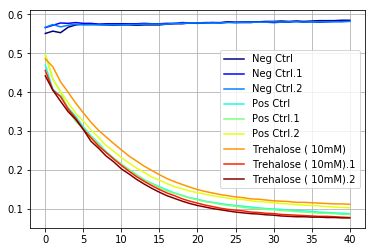

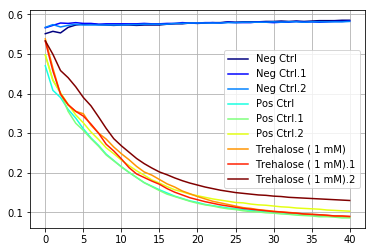

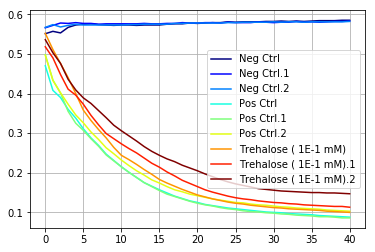

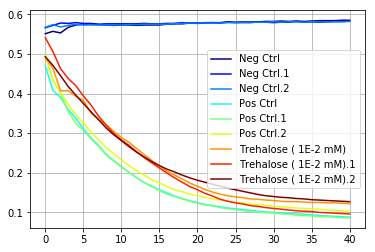

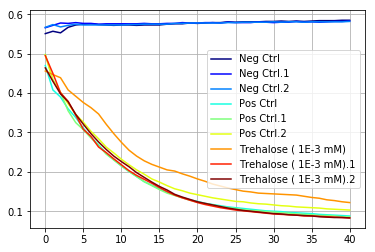

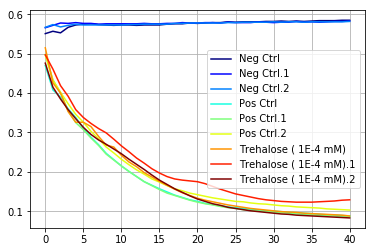

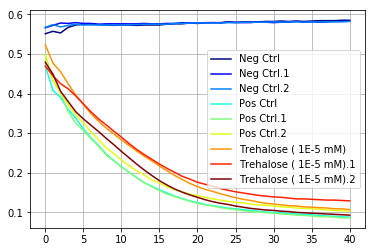

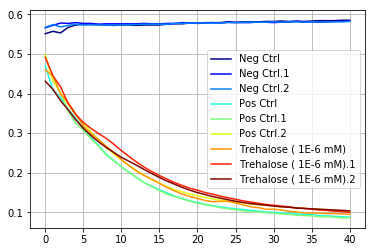

In [17]:


 #   df_treh=raw_data2.loc[:,colnames[11:11+j*3]]
#plt.figure(figsize=(20,20)) 
NCURVES = 9
values = range(NCURVES)
#fig = plt.figure()
#plt.subplot(4,4,i)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
df_negC=raw_data2.loc[:,colnames[5:8]]
#df_negC.head()
df_posC=raw_data2.loc[:,colnames[8:11]]
#df_posC.head()
SLOPES2=[]
AUCS=[]
for i in range(1, 9):
    df1=raw_data2.loc[:,colnames[11+(i-1)*3:11+i*3]]
    
    df=pd.concat([df_negC,df_posC,df1], axis=1)
    
    #plt.figure(figsize=(7,5))
    lines = []
    num=0
    slope2=[]
    AUC=[]
    for column in df:

        line = df[column]
        colorVal = scalarMap.to_rgba(values[num])
        colorText = (
            '(%s)'%(column)
            )
        retLine = plt.plot(line,color=colorVal,label=column)
        lines.append(retLine)
        y = np.array(df.loc[5:, column])

        # Compute the area using the composite trapezoidal rule.
        area = trapz(y, dx=35)
        AUC.append(area)
        slp2= (df.loc[10, column]-df.loc[5, column])/5
        slope2.append(slp2)
        num+=1
    #added this to get the legend to work
    #handles,labels = plt.get_legend_handles_labels()
    plt.legend(df.columns, loc='best')
    plt.grid()
    plt.show()
    AUCS.append(AUC)
    SLOPES2.append(slope2)
    #print("area =", area)

    # Compute the area using the composite Simpson's rule.
    #area = simps(y, dx=40)
    #print("area =", area)
    #print("AUC=",AUC)

    

(0.0, 5.0)


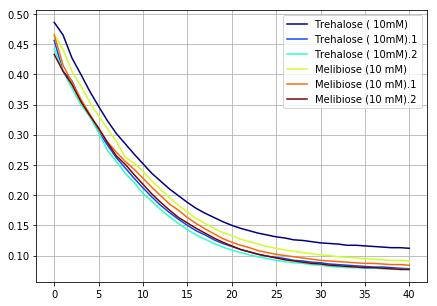

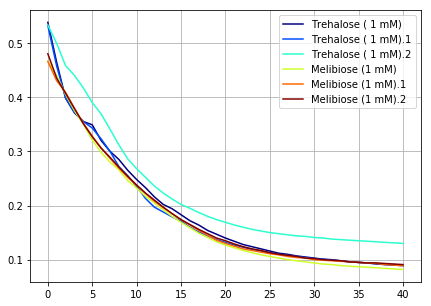

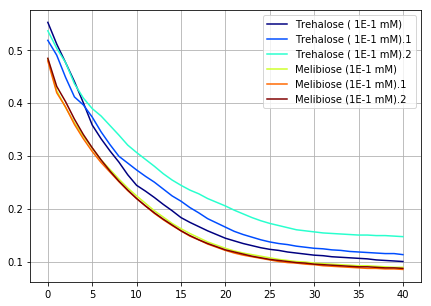

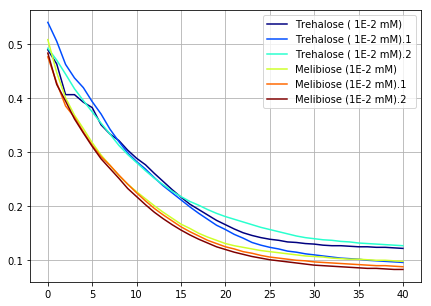

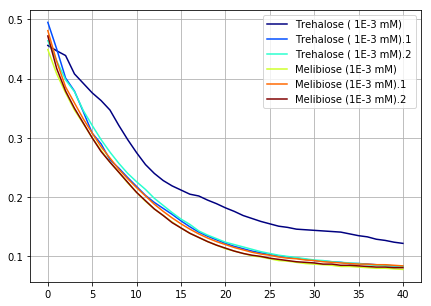

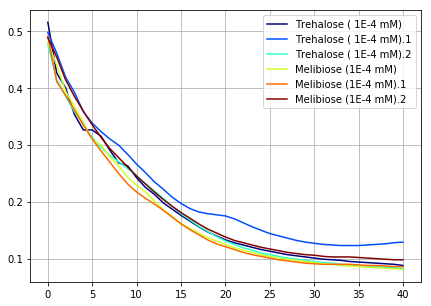

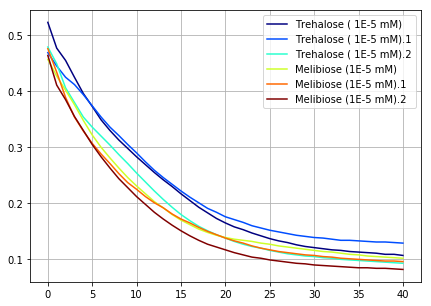

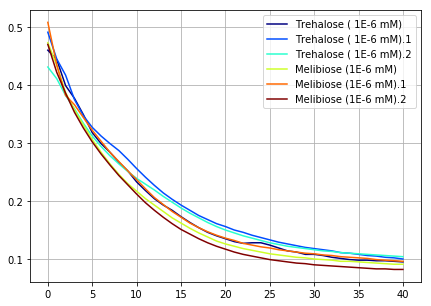

In [20]:
## test slope calc
from __future__ import print_function

from scipy.integrate import simps
from numpy import trapz#for j in range(1,2):
##in anaconda terminal "pip install mpld3"
%matplotlib inline
import mpld3
mpld3.enable_notebook()

 #   df_treh=raw_data2.loc[:,colnames[11:11+j*3]]
#plt.figure(figsize=(20,20)) 
NCURVES = 6
values = range(NCURVES)
#fig = plt.figure()
#plt.subplot(4,4,i)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
#AUCS=[]
#SLOPES=[]
#SLOPES2=[]
for i in range(1, 9):
    df1=raw_data2.loc[:,colnames[35+(i-1)*3:35+i*3]]
    df_treh=raw_data2.loc[:,colnames[11+(i-1)*3:11+i*3]]
    df=pd.concat([df_treh,df1], axis=1)
    
    plt.figure(figsize=(7,5))
    lines = []
    num=0
    #AUC=[]
    #slope=[]
    #slope2=[]
    for column in df:

        line = df[column]
        colorVal = scalarMap.to_rgba(values[num])
        colorText = (
            '(%s)'%(column)
            )
        retLine = plt.plot(line,color=colorVal,label=column)
        lines.append(retLine)
        y = np.array(df.loc[5:, column])

        # Compute the area using the composite trapezoidal rule.
        #area = trapz(y, dx=35)
        #AUC.append(area)
        #z = np.array(df.loc[[5,7,10], column])
        #slp = np.gradient(z)
        #slope.append(slp)
        #slp2= (df.loc[10, column]-df.loc[5, column])/5
        #slope2.append(slp2)
        num+=1
    #added this to get the legend to work
    #handles,labels = plt.get_legend_handles_labels()
    plt.legend(df.columns, loc='best')
    plt.grid()
    plt.show()
    
    #print("area =", area)

    # Compute the area using the composite Simpson's rule.
    #area = simps(y, dx=40)
    #print("area =", area)
    #print("AUC=",AUC)
    #print("slope=",slope)
    #print("slope2=",slope2)   
   ##AUCS.append(AUC)    
    #SLOPES.append(slope)
    #SLOPES2.append(slope2)
    
#print("AUCS", AUCS)

#print("SLOPES", SLOPES)


In [21]:
column_list=['trehalose','trehalose','trehalose','Melibiose','Melibiose','Melibiose']

In [22]:
#index_list=['10mM','1mM','0.1mM','0.01mM','0.001mM','0.0001mM','0.00001mM','0.000001mM']
index_list=[10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]

(0.0, 5.0)


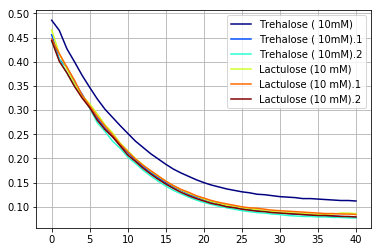

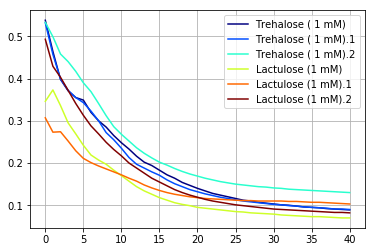

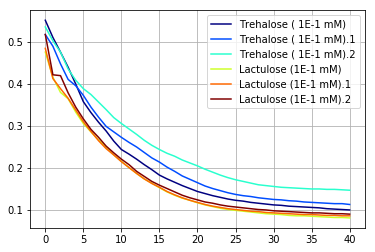

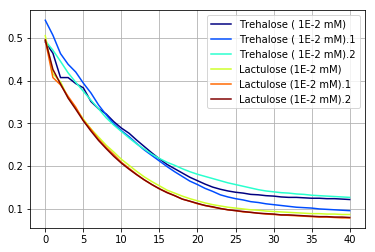

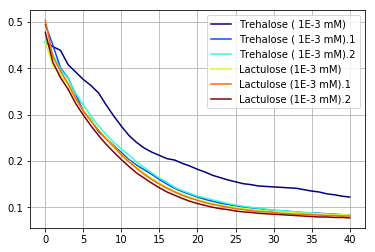

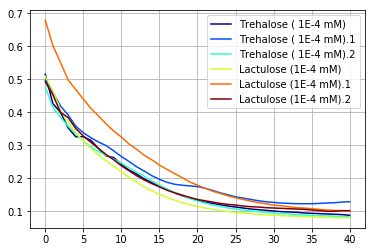

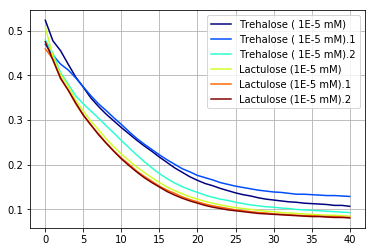

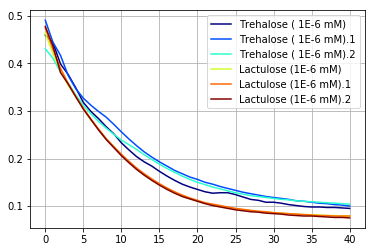

In [23]:
#second compound
#plt.figure(figsize=(20,20)) 
NCURVES = 6
values = range(NCURVES)
#fig = plt.figure()
#plt.subplot(4,4,i)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())

#AUCS=[]
#SLOPES=[]
#SLOPES2=[]
for i in range(1, 9):
    df1=raw_data2.loc[:,colnames[59+(i-1)*3:59+i*3]]
    df_treh=raw_data2.loc[:,colnames[11+(i-1)*3:11+i*3]]
    df=pd.concat([df_treh,df1], axis=1)
    
    #plt.figure(figsize=(7,5))
    lines = []
    
    #AUC=[]
    #slope=[]
    #slope2=[]
    num=0
    for column in df:

        line = df[column]
        colorVal = scalarMap.to_rgba(values[num])
        colorText = (
            '(%s)'%(column)
            )
        retLine = plt.plot(line,color=colorVal,label=column)
        lines.append(retLine)
        y = np.array(df.loc[5:, column])

        # Compute the area using the composite trapezoidal rule.
       #area = trapz(y, dx=35)
        #AUC.append(area)
        #z = np.array(df.loc[[5,7,10], column])
        #slp = np.gradient(z)
        #slope.append(slp)
        #slp2= (df.loc[10, column]-df.loc[5, column])/5
        #slope2.append(slp2)
        num+=1
    #added this to get the legend to work
    #handles,labels = plt.get_legend_handles_labels()
    plt.legend(df.columns, loc='best')
    plt.grid()
    plt.show()
    
    #print("AUC=",AUC)
    #print("slope=",slope)
    #print("slope2=",slope2)   
    #AUCS.append(AUC)    
    #SLOPES.append(slope)
    #SLOPES2.append(slope2)
    
#print("AUCS", AUCS)

#print("SLOPES", SLOPES)

#print("SLOPES2", SLOPES2)